<a href="https://colab.research.google.com/github/kassy75035/1st-PyCrawlerMarathon/blob/master/Day71_%E4%BD%BF%E7%94%A8%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
model = Sequential()

In [7]:
#卷積層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [11]:
model.add(Dropout(rate=0.25))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [16]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [17]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(10, activation='softmax'))

In [19]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# 載入之前訓練的模型

In [ ]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [21]:
b
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [22]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Epoch 1/12
293/293 [==============================] - 113s 382ms/step - loss: 0.0902 - accuracy: 0.1083 - val_loss: 0.0899 - val_accuracy: 0.1111
Epoch 2/12
293/293 [==============================] - 108s 370ms/step - loss: 0.0901 - accuracy: 0.1114 - val_loss: 0.0898 - val_accuracy: 0.1138
Epoch 3/12
293/293 [==============================] - 108s 368ms/step - loss: 0.0899 - accuracy: 0.1187 - val_loss: 0.0897 - val_accuracy: 0.1239
Epoch 4/12
293/293 [==============================] - 108s 369ms/step - loss: 0.0898 - accuracy: 0.1233 - val_loss: 0.0897 - val_accuracy: 0.1347
Epoch 5/12
293/293 [==============================] - 107s 365ms/step - loss: 0.0897 - accuracy: 0.1285 - val_loss: 0.0896 - val_accuracy: 0.1435
Epoch 6/12
293/293 [==============================] - 107s 364ms/step - loss: 0.0897 - accuracy: 0.1333 - val_loss: 0.0896 - val_accuracy: 0.1510
Epoch 7/12
293/293 [==============================] - 107s 365ms/step - loss: 0.0896 - accuracy: 0.1345 - val_loss: 0.0895 -

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

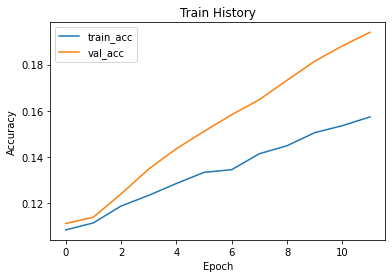

In [24]:
show_train_history('accuracy','val_accuracy')

In [25]:
# 評估模型準確率
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 8s 25ms/step - loss: 0.0892 - accuracy: 0.1990

accuracy= 0.19900000095367432


In [26]:
model.compile(loss="binary_crossentropy", optimizer='sgd', metrics=['accuracy'])


In [27]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Epoch 1/12
293/293 [==============================] - 116s 392ms/step - loss: 0.3527 - accuracy: 0.1504 - val_loss: 0.3622 - val_accuracy: 0.2170
Epoch 2/12
293/293 [==============================] - 110s 374ms/step - loss: 0.3262 - accuracy: 0.1707 - val_loss: 0.3590 - val_accuracy: 0.2398
Epoch 3/12
293/293 [==============================] - 109s 372ms/step - loss: 0.3213 - accuracy: 0.1904 - val_loss: 0.3542 - val_accuracy: 0.2676
Epoch 4/12
293/293 [==============================] - 109s 374ms/step - loss: 0.3161 - accuracy: 0.2060 - val_loss: 0.3490 - val_accuracy: 0.2710
Epoch 5/12
293/293 [==============================] - 108s 368ms/step - loss: 0.3104 - accuracy: 0.2255 - val_loss: 0.3443 - val_accuracy: 0.2936
Epoch 6/12
293/293 [==============================] - 108s 369ms/step - loss: 0.3060 - accuracy: 0.2389 - val_loss: 0.3397 - val_accuracy: 0.2946
Epoch 7/12
293/293 [==============================] - 109s 372ms/step - loss: 0.3026 - accuracy: 0.2501 - val_loss: 0.3361 -

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

In [31]:
# 評估模型準確率
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 7s 23ms/step - loss: 0.3241 - accuracy: 0.3328

accuracy= 0.3328000009059906
